# Cleaning the Dataset
This jupyter notebook is about cleaning the dataset of the competition. 

## Dataset Structure:

- **Categorical Data:**
  - **compset_group:** Represents different categories or groups of brands. There are 20 unique categories in this column.
  - **compset:** Indicates specific brand sets within each category. There are 54 unique values in this column.
  - **business_entity_doing_business_as_name:** Names of the businesses or brands. There are 706 unique names in this column.
  - **legal_entity_name:** Legal names of the entities or brands. There are 423 unique names.
  - **domicile_country_name:** Countries where the businesses are based. There are 26 unique countries.
  - **ultimate_parent_legal_entity_name:** Names of the ultimate parent companies. There are 401 unique names.
  - **primary_exchange_name:** Names of the primary stock exchanges where the companies are listed. There are 30 unique exchanges.
  - **calculation_type:** This column is redundant and can be dropped as it only contains one value.
  - **period:** Represents the period, but it's redundant and can be dropped.
  - **period_end_date:** Dates marking the end of each period. There are 455 unique dates.
  
Now, keeping this structure in mind, we can proceed with data cleaning, exploration, and further analysis as needed to address the specific objectives and requirements of the project. Let me know if you need further assistance with any specific aspect of the analysis!

## Potential Cleaning Steps: 

1. Handling Redundant Columns:
   - Drop the `period` and `calculation_type` columns from the dataset.

2. Dealing with Missing Values:
   - Check for missing values:
     ```python
     missing_values = df.isnull().sum()
     ```
   - Decide on the appropriate strategy based on the amount of missing data:
      * Imputation
      * Deletion of rows or columns
      * Mean or median substitution
3. Addressing inconsistent or Erroneous Values:
   - Check for any inconsistent or erroneous values in the dataset.
   - Correct or remove such values as needed.
   - Review the unique values in each column to identify any anomalies. (Ensure consistency in naming conventions, formats, etc.)
   - Standardize the labels or correcting errors in the data
4. Datatype Conversion:
   - Convert columns to appropriate data types (e.g., dates to datetime objects, numerical values to integers or floats, etc.)
5. Handling Outliers:
   - Identify and address any outliers in the dataset.
   - Decide on the appropriate strategy for handling outliers (e.g., removing, transforming, or keeping them).
   - For numerical features, detect outliers using methods such as Interquartile Range (IQR) or Z-score.
   - Visualize the distribution of numerical values using boxplots, histograms, or scatterplots to spot outliers.
   - Decide whether to remove outliers or handle them through transformations or imputation methods.

6. Addressing Contaminated Data:
   - Check for any duplicate rows in the dataset.
   - Remove duplicate rows if necessary.
   - Address issues such as incorrect data types or spelling variations that may lead to duplicate entries.
7. Addressing Highly Correlated Features:
   - Calculate the correlation matrix to identify highly correlated features. (indicating redundancy)
   - Use Visualization or statistical methods to identify and address multicollinearity. (heatmaps, scatter plots, dendograms, etc.)
   - Decide which features to keep or remove based on the correlation analysis.
   - Decide which features to remove based on the strength of correlation and relevance to the analysis.


## Cleaning the Dataset (Categorial Data):

In [1]:
# Loading  the data
import pandas as pd
data_path = '../data/skylab_instagram_datathon_dataset.csv'
df = pd.read_csv(data_path, sep=';')

### Handling Redundant Columns:

In [2]:
# Drop the `period` and `calculation_type` columns from the dataset. 
df.drop(['period', 'calculation_type'], axis=1, inplace=True)
df

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
0,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,22066189.0,97.0,13.0,16239.0,6112205.0
1,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,24289963.0,54.0,2.0,13358.0,3189144.0
2,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,7137442.0,42.0,8.0,15894.0,2152955.0
3,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,18901125.0,73.0,9.0,26762.0,5224916.0
4,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,30251374.0,54.0,10.0,25681.0,5760987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
704308,2017-03-18,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,NaN,50.0,8.0,1271.0,14818.0
704309,2018-10-27,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,163873.0,125.0,2.0,1764.0,34188.0
704310,2023-08-05,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,319485.0,118.0,35.0,1697.0,6328.0
704311,2019-11-02,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,228699.0,129.0,2.0,1972.0,29174.0


### Dealing with Data Contaminations


In [28]:
from fuzzywuzzy import fuzz

def check_compset_column(df, column):
    """
    Check for potential data contamination or inconsistencies in the categorical columns.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the dataset.
    - column (str): The name of the column to check.
    
    Returns:
    - unique_values (list): A list of unique values in the column.
    - potential_duplicates (dict): Dictionary containing potential duplicate pairs and their similarity scores.
    """

    # Check unique values in the specified column
    unique_values = df[column].unique()
    
    # Check for potential duplicate columns
    potential_duplicates = {}
    for i, value1 in enumerate(unique_values):
        for j, value2 in enumerate(unique_values):
            if i < j:  # Avoid comparing the same values and unnecessary duplication
                # check if the values are strings
                if not isinstance(value1, str) or not isinstance(value2, str):
                    continue
                similarity_score = fuzz.ratio(value1, value2)
                if similarity_score > 80:  # Adjust threshold as needed
                    # Add potential duplicate pair and their similarity score to the dictionary
                    potential_duplicates[(value1, value2)] = similarity_score
    
    return unique_values, potential_duplicates

#### Checking for Duplicate Rows:

In [18]:
unique_values, potential_duplicates = check_compset_column(df, 'compset_group')
print(f'{unique_values}')
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['Luxury & Premium & Mainstream' 'Restaurants' 'Beverages'
 'Apparel Retail' 'Food Products' 'Sporting Goods'
 'Sportswear & Athleisure' 'Beauty & Boutique' 'Building Products'
 'Petcare' 'Toys & Collectibles' 'Mattress' 'Fitness & Exercise'
 'Food Retail' 'Discount Retailers ' 'Outdoor Gear'
 'Dermatology and Orthodontics' 'Entertainment' 'Home Appliances'
 'Study (All Brands)']
Potential Duplicate Values: {}


In [19]:
unique_values, potential_duplicates = check_compset_column(df, 'compset')
print(unique_values)
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['Soft Luxury' 'Luxury & Premium & Mainstream'
 'US Softlines Analyst Interest List'
 'Global Luxury Analysts Interest List' 'Coffee' 'Restaurants' 'Beverages'
 'Sports drinks' 'Energy drinks' 'Fast Fashion'
 'Omnichannel Apparel Retail' 'Apparel Retail' 'US Department Store'
 'Latam Apparel Retail' 'Food Products' 'Snack Bars' 'Pasta Sauce'
 'Ecommerce Apparel Retail' 'Ecommerce Mainstream Apparel Retail'
 'Sporting Goods' 'Casual Dining' 'Hard Luxury' 'Sportswear & Athleisure'
 'Athleisure' 'Footwear' 'Beauty & Boutique' 'Building Products'
 'Sportswear' 'Petcare' 'Premium Brands' 'QSR' 'Alcohol'
 'Toys & Collectibles' 'Mattress' 'Fitness & Exercise' 'US Discount Store'
 'Ecommerce Luxury Apparel Retail' 'Plant-Based Meat' 'Food Retail'
 'Discount Retailers ' 'Mid-Range Watch & Jewelry' 'Outdoor Gear'
 'Plant-Based Dairy' 'Mainstream Brands' 'Dermatology and Orthodontics'
 'Dermatology' 'Entertainment' 'Workout Gear' 'Yoghurt' 'Home Appliances'
 'Soda' 'Fast Casual' 'Study (All Brand

In [20]:
unique_values, potential_duplicates = check_compset_column(df, 'business_entity_doing_business_as_name')
print(unique_values)
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['Versace' "Tim Horton's" 'Gatorade' 'Monster Energy' 'Aritzia' 'Lovisa'
 'Saks Fifth Avenue' 'Ferragamo' 'Riachuelo' 'Louis Vuitton'
 'Nature Valley' "Rao's" 'YesStyle' 'Academy Sports + Outdoors'
 'Outback Steakhouse' 'Cartier' 'Costa Coffee' 'Lululemon' 'Clif Bar'
 'Richards' 'Steve Madden' 'DTLR' 'IL MAKIAGE' 'Topshop' 'Boral'
 'Skechers' 'Balmain Beauty' 'Meow Mix' 'Michael Kors' 'Chloe' 'Wingstop'
 'Absolut' 'Miniso' 'TAG Heuer' 'Helix' 'C&A Brasil' 'YSL Beauty' 'C&A'
 'Saint Laurent' 'Mirror' 'Dermalogica' 'Saks Off Fifth' 'LORO PIANA'
 'Topman' 'Garnier' 'The RealReal' 'Beyond Meat' 'Volcom' 'Hourglass'
 'Pure Farmland' 'Esprit' 'Buffalo Wild Wings' 'Boozt' 'Aldi'
 'Banana Republic' 'Sam Edelman' 'Lord + Taylor' 'Blink Fitness'
 'BodyArmor' 'Tempur' 'Dollar Tree' 'MVMT' 'Champs Sports' 'Macpac'
 'Burberry' 'Certina' 'Nine West' 'Sofina' 'Alme' 'Hoegaarden'
 'Eddie Bauer' 'Minor Figures' 'Pure Group' 'CertainTeed' 'Mango' 'Nectar'
 'Fabula' 'Brahma' 'Hering' 'Nordstrom' 'Audemar

In [29]:
unique_values, potential_duplicates = check_compset_column(df, 'legal_entity_name')
print(unique_values)
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['Capri Holdings' 'Restaurant Brands International' 'Pepsi'
 'Monster Energy' 'Aritzia' 'Lovisa' 'Saks Fifth Avenue'
 'Salvatore Ferragamo' 'Guararapes' 'LVMH Moet Hennessy Louis Vuitton SE'
 'General Mills' 'Sovos Brands Intermediate Inc' 'YesAsia Holdings Ltd'
 'Academy Sports + Outdoors' 'Outback Steakhouse' 'Richemont' 'Coca-Cola'
 'Lululemon' 'Clif Bar & Co' 'Inbrands SA' 'Steve Madden' 'JD Sports'
 'Il Makiage Ltd' 'Asos' 'Boral' 'Skechers' 'Mayhoola for Investments Spc'
 'J M Smucker Co' 'Wingstop Inc' 'Pernod Ricard'
 'MINISO Group Holding Ltd' 'Helix Sleep Inc' 'C&A MODAS SA' "L'Oreal"
 'COFRA Holding AG' 'Kering' 'Unilever NV' "Hudson's Bay" 'The RealReal'
 'Beyond Meat' 'Authentic Brands Group LLC' 'Hour Glass Ltd'
 'Pure Farmland' 'Esprit Holdings Ltd' 'Buffalo Wild Wings' 'Boozt AB'
 'Aldi' 'Gap' 'Caleres Inc' 'Le Tote Inc' 'THE RELATED COMPANIES, L.P.'
 'BA Sports Nutrition LLC' 'Tempur Sealy International Inc' 'Dollar Tree'
 'Movado Group Inc' 'Foot Locker' 'Super Retail

In [50]:
# show a dataframe that only has Hering and Kering values in the legal_entity_name column
df_unilever = df[df['legal_entity_name'].isin(['Unilever', 'Unilever NV'])]
df_unilever

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
42910,2016-09-24,Beauty & Boutique,Beauty & Boutique,Dermalogica,Unilever NV,NaN,Unilever NV,NaN,276864.0,409.0,50.0,1933.0,46334.0
42911,2021-07-17,Beauty & Boutique,Beauty & Boutique,Dermalogica,Unilever NV,NaN,Unilever NV,NaN,1275246.0,640.0,67.0,45209.0,125280.0
42912,2017-02-11,Beauty & Boutique,Beauty & Boutique,Dermalogica,Unilever NV,NaN,Unilever NV,NaN,327721.0,407.0,95.0,2614.0,56685.0
42913,2019-04-06,Beauty & Boutique,Beauty & Boutique,Dermalogica,Unilever NV,NaN,Unilever NV,NaN,687833.0,569.0,50.0,23386.0,142110.0
42914,2016-06-25,Beauty & Boutique,Beauty & Boutique,Dermalogica,Unilever NV,NaN,Unilever NV,NaN,250842.0,406.0,22.0,1460.0,49162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
697483,2023-07-15,Beauty & Boutique,Beauty & Boutique,TIGI,Unilever,United Kingdom of Great Britain and Northern I...,Unilever,London Stock Exchange,339071.0,47.0,8.0,1941.0,2744.0
697484,2023-08-05,Beauty & Boutique,Beauty & Boutique,TIGI,Unilever,United Kingdom of Great Britain and Northern I...,Unilever,London Stock Exchange,339708.0,30.0,12.0,1214.0,1643.0
697485,2016-07-02,Beauty & Boutique,Beauty & Boutique,TIGI,Unilever,United Kingdom of Great Britain and Northern I...,Unilever,London Stock Exchange,NaN,92.0,6.0,174.0,7403.0
697486,2021-02-27,Beauty & Boutique,Beauty & Boutique,TIGI,Unilever,United Kingdom of Great Britain and Northern I...,Unilever,London Stock Exchange,340072.0,139.0,17.0,575.0,15934.0


we think that the Unilever and Unilever NV are not the same company, so we will keep them as they are

In [51]:
unique_values, potential_duplicates = check_compset_column(df, 'domicile_country_name')
print(unique_values)
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['United States of America' 'Canada' 'Australia' nan 'Italy' 'Brazil'
 'France' 'Hong Kong' 'Switzerland'
 'United Kingdom of Great Britain and Northern Ireland' 'Singapore'
 'Sweden' 'Japan' 'Belgium' 'New Zealand' 'Spain' 'Germany' 'Netherlands'
 'Mexico' 'Philippines' ';' 'Poland' ';France' 'China' 'Belgium;'
 'Denmark' 'China;Hong Kong']
Potential Duplicate Values: {('France', ';France'): 92, ('Belgium', 'Belgium;'): 93}


Found some duplicate rows! Let's see what they are

In [ ]:
# show the dataframe where the 'domicile_country_name' are 'France' and ';France'
df[df['domicile_country_name'].isin([';France'])]

In [53]:
# # change the values of the domicile_country_name column from ';France' to 'France'
# df['domicile_country_name'] = df['domicile_country_name'].str.replace(';France', 'France')
# df['domicile_country_name'].unique()

array(['United States of America', 'Canada', 'Australia', nan, 'Italy',
       'Brazil', 'France', 'Hong Kong', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Singapore', 'Sweden', 'Japan', 'Belgium', 'New Zealand', 'Spain',
       'Germany', 'Netherlands', 'Mexico', 'Philippines', ';', 'Poland',
       'China', 'Belgium;', 'Denmark', 'China;Hong Kong'], dtype=object)

### Dealing with Missing Values

#### Checking for Missing Values:

Missing data types are categorized into 3 groups in the literature:
* **Missing Completely At Random (MCAR)**:   
In the MCAR case, there is no relationship between the missing data and the other values in the data set. In other words, the missing values are completely independent of the other data. As the missing values increase, the overall information content of the data set decreases. This can affect the accuracy and reliability of the analysis results.    

* **Missing At Random (MAR)**:   
MAR is a type of missing data where the missing data is correlated with other observed values. In this case, missing data does not occur randomly, but is missing according to a specific pattern. This pattern can be explained by a variable for which we have information about the cause of the missingness. If missing data of this type is ignored, the results of the analysis may not reflect the real situation.

* **Missing Not At Random (MNAR)**:   
MNAR is a type of missing data where the missing data is due to unobserved data and cannot be explained by other observed data. If there is a structure or pattern in the missing data and this pattern cannot be explained by the observed data, it can be categorized as MNAR.

In [3]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

period_end_date                                0
compset_group                                  0
compset                                        0
business_entity_doing_business_as_name         0
legal_entity_name                          27755
domicile_country_name                     245724
ultimate_parent_legal_entity_name          27755
primary_exchange_name                     245724
followers                                 125055
pictures                                    8510
videos                                     19964
comments                                    8970
likes                                       8336
dtype: int64

In [4]:
def missing_values(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table = missing_values(df)
missing_values_table

Your selected dataframe has 13 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
domicile_country_name,245724,34.9
primary_exchange_name,245724,34.9
followers,125055,17.8
legal_entity_name,27755,3.9
ultimate_parent_legal_entity_name,27755,3.9
videos,19964,2.8
comments,8970,1.3
pictures,8510,1.2
likes,8336,1.2


<AxesSubplot:>

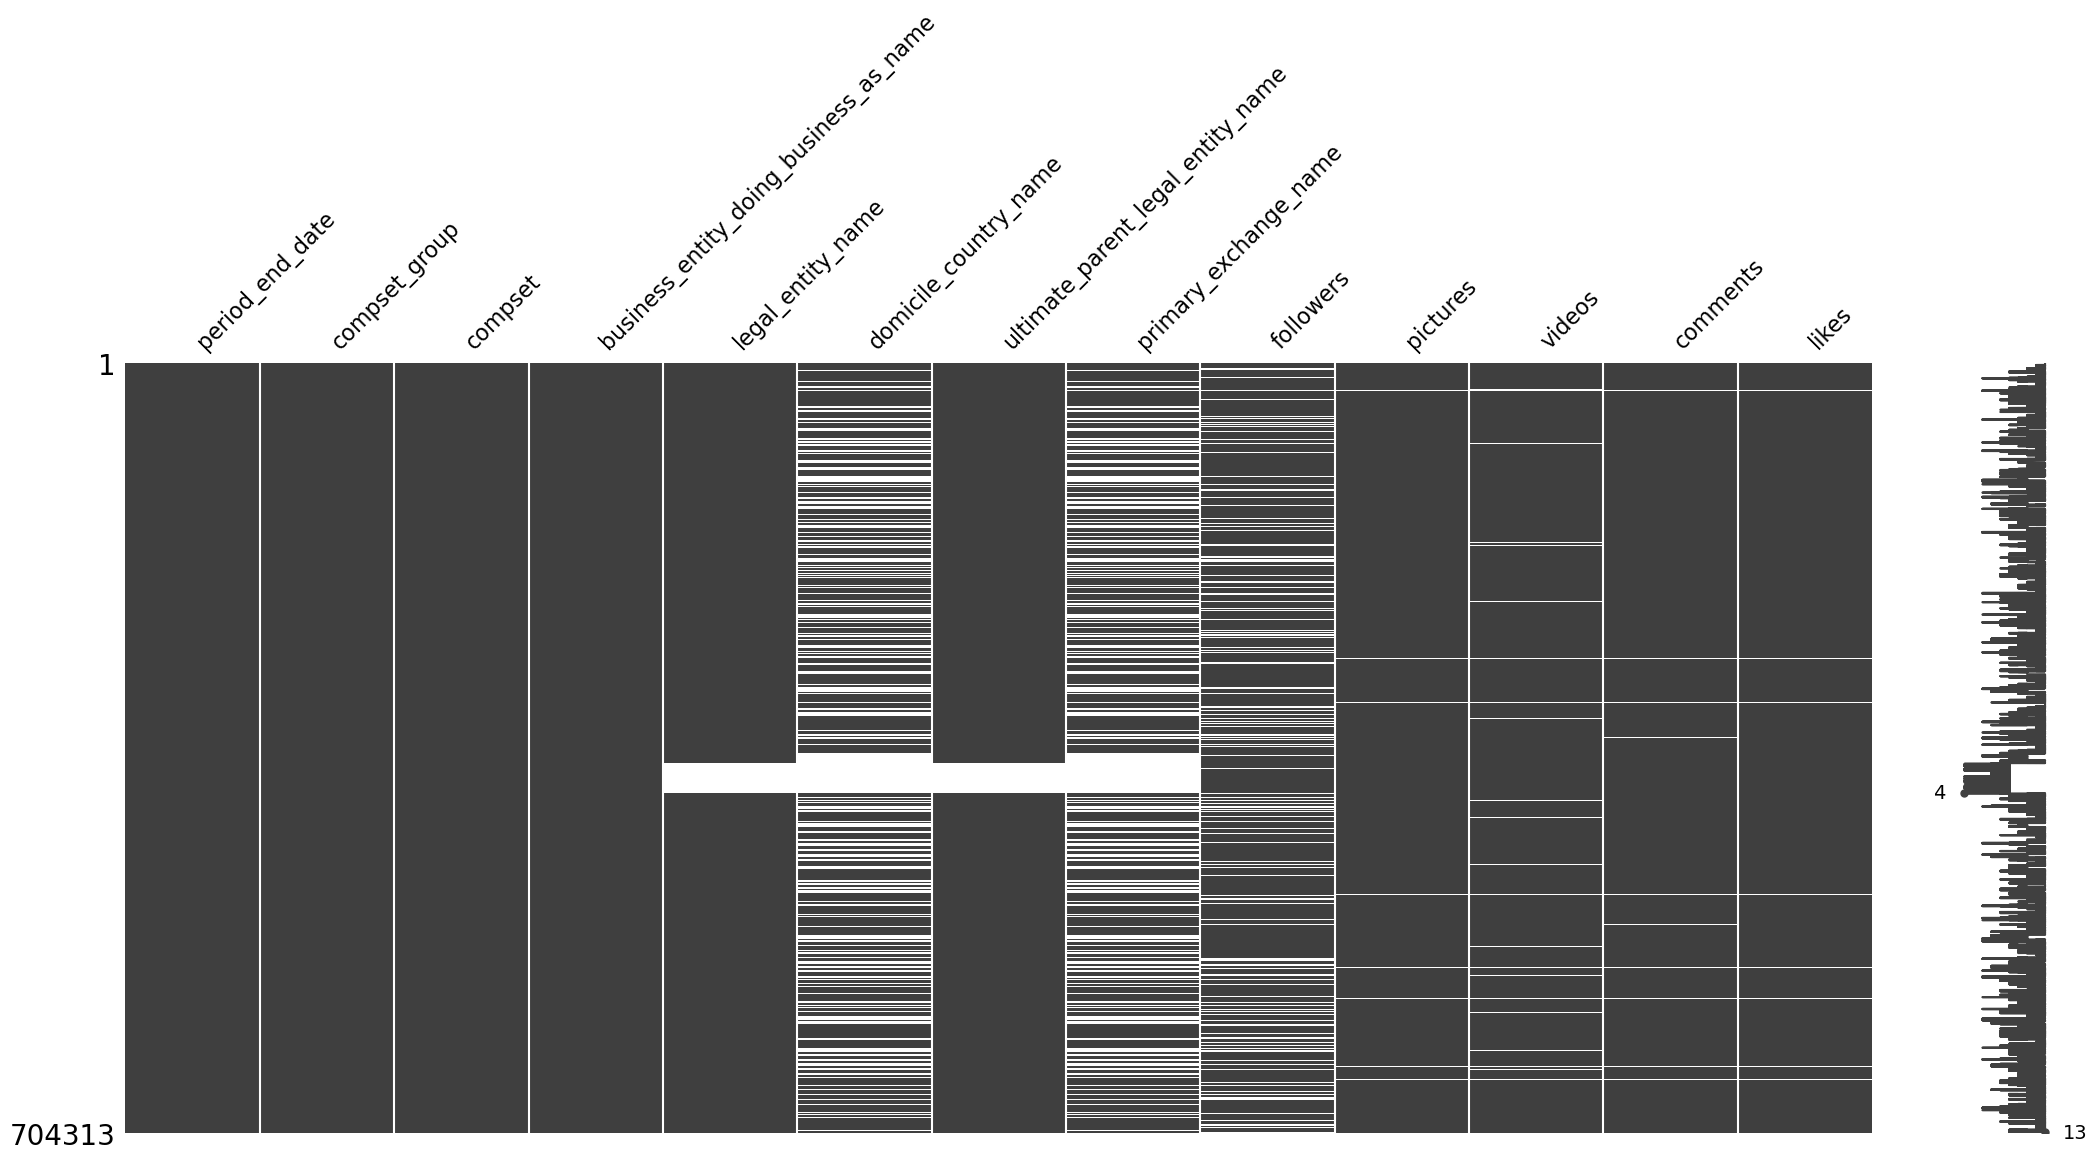

In [5]:
import missingno as msno
msno.matrix(df)